# 1. Yolov5 학습

## 1-1. roboflow 라벨링 파일 불러오기

**roboflow**에서 라벨링 한 data: Crawling2_3
바운딩 박스 좌표가 담겨져있는 txt 파일 내의 라벨링을 실행.   
두번째 줄의 0을 1로 변경. (0: 상의, 1: 하의)

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TQSzrquryjgQeBOXeuKm")
project = rf.workspace("yun-mtrzl").project("crawling2")
version = project.version(3)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crawling2-3 in yolov5pytorch:: 100%|██████████| 2170/2170 [00:00<00:00, 11725.65it/s]


In [2]:
import os

def update_second_line_in_folders(folder_paths):
    for folder_path in folder_paths:
        print(f"폴더: {folder_path}")
        # 폴더 내의 모든 텍스트 파일에 대해 작업
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(folder_path, filename)

                # 텍스트 파일 읽기
                with open(file_path, 'r') as file:
                    lines = file.readlines()

                # 두 번째 줄이 존재하고, 맨 앞의 숫자가 0일 경우에만 작업 수행
                if len(lines) > 1 and lines[1][0] == '0':
                    # 두 번째 줄의 맨 앞의 0을 1로 변경
                    lines[1] = '1' + lines[1][1:]

                    # 변경된 텍스트 파일 저장 (기존 파일 덮어쓰기)
                    with open(file_path, 'w') as file:
                        file.writelines(lines)

                    # 확인을 위해 변경된 부분 출력
                    print(f"{filename} - 변경 후 두 번째 줄: {lines[1].strip()}")

        print("작업 완료\n")

# 사용자에게 폴더 경로 입력 받기
dataset_folder1 = '/data1/project/seoeun/BAF/색상추출/Crawling2-3/test/labels' 
dataset_folder2 = '/data1/project/seoeun/BAF/색상추출/Crawling2-3/train/labels'
dataset_folder3 = '/data1/project/seoeun/BAF/색상추출/Crawling2-3/valid/labels'

# 함수 호출
update_second_line_in_folders([dataset_folder1, dataset_folder2, dataset_folder3])


폴더: /data1/project/seoeun/BAF/색상추출/Crawling2-3/test/labels
image_179_jpg.rf.2a50788498387f5bebf5abc2c3d11cdc.txt - 변경 후 두 번째 줄: 1 0.4796875 0.6734375 0.28984375 0.26328125
image_1046_jpg.rf.1d43e5df8c52932d311086ce26e0a06e.txt - 변경 후 두 번째 줄: 1 0.52109375 0.63046875 0.1671875 0.35078125
image_418_jpg.rf.8feb2a4f9d599d65094dfd9d3846be9f.txt - 변경 후 두 번째 줄: 1 0.5015625 0.6421875 0.25078125 0.375
image_140_jpg.rf.4f1b24455a615bb6568466ffc2fe4c14.txt - 변경 후 두 번째 줄: 1 0.51171875 0.64921875 0.2515625 0.5015625
image_403_jpg.rf.19f10e6cec696929d6a4a4057fde7196.txt - 변경 후 두 번째 줄: 1 0.51796875 0.9140625 0.428125 0.17109375
image_604_jpg.rf.ddcf7c0e9ef58d04215d8f0f3b819df7.txt - 변경 후 두 번째 줄: 1 0.49453125 0.7015625 0.1671875 0.359375
image_539_jpg.rf.d3508d7810c7f4c9a08a9f59fc54795e.txt - 변경 후 두 번째 줄: 1 0.50078125 0.65234375 0.2453125 0.4296875
image_985_jpg.rf.f038025830f563ec560971e7b0f18fd8.txt - 변경 후 두 번째 줄: 1 0.50625 0.66171875 0.19765625 0.52578125
image_127_jpg.rf.f07478f2f9112b731e19406d435

## 1-2. Yolov5 학습

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 11.03 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.


In [2]:
%cd /data1/project/seoeun/BAF/색상추출/yolov5/

/data1/project/seoeun/BAF/색상추출/yolov5


In [3]:
!pip install -r requirements.txt

In [ ]:
!python  train.py --img 416 --batch 16 --epochs 100 --data /data1/project/seoeun/BAF/색상추출/Crawling2_3/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name best_yolov5s_result --device=0
# 7m 50.1s 걸림.

2024-11-02 10:34:24.783697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 10:34:24.797214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 10:34:24.801611: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/data1/project/seoeun/BAF/색상추출/Crawling2_3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_w

## 1-3.  TOP, BOTTOM 검출 확인하기

In [6]:
!python detect.py --weights /data1/project/seoeun/BAF/색상추출/yolov5/runs/train/best_yolov5s_result2/weights/best.pt --source "/data1/project/seoeun/BAF/색상추출/test1.jpg"

detect: weights=['/data1/project/seoeun/BAF/색상추출/yolov5/runs/train/best_yolov5s_result2/weights/best.pt'], source=/data1/project/seoeun/BAF/색상추출/test1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data1/project/seoeun/BAF/색상추출/test1.jpg: 640x448 1 TOP, 1 BOTTOM, 32.1ms
Speed: 0.5ms pre-process, 32.1ms inference, 385.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [7]:
!python detect.py --weights /data1/project/seoeun/BAF/색상추출/yolov5/runs/train/best_yolov5s_result2/weights/best.pt --source "/data1/project/seoeun/BAF/색상추출/test2.jpg"

detect: weights=['/data1/project/seoeun/BAF/색상추출/yolov5/runs/train/best_yolov5s_result2/weights/best.pt'], source=/data1/project/seoeun/BAF/색상추출/test2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data1/project/seoeun/BAF/색상추출/test2.jpg: 640x448 1 TOP, 1 BOTTOM, 28.8ms
Speed: 0.4ms pre-process, 28.8ms inference, 369.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [8]:
!python detect.py --weights /data1/project/seoeun/BAF/색상추출/yolov5/runs/train/best_yolov5s_result2/weights/best.pt --source "/data1/project/seoeun/BAF/색상추출/test3.jpg"

detect: weights=['/data1/project/seoeun/BAF/색상추출/yolov5/runs/train/best_yolov5s_result2/weights/best.pt'], source=/data1/project/seoeun/BAF/색상추출/test3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data1/project/seoeun/BAF/색상추출/test3.jpg: 640x448 1 TOP, 2 BOTTOMs, 29.1ms
Speed: 0.4ms pre-process, 29.1ms inference, 345.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


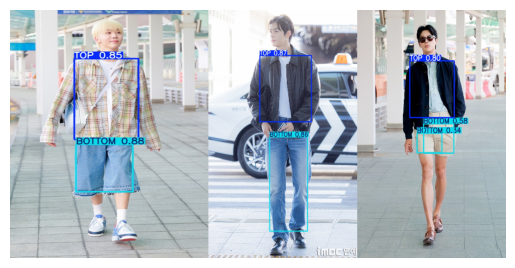

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt  # 일반 Python 환경에서 이미지 출력용

# 이미지 경로 설정
img_path1 = '/data1/project/seoeun/BAF/색상추출/yolov5/runs/detect/exp/test1.jpg'
img_path2 = '/data1/project/seoeun/BAF/색상추출/yolov5/runs/detect/exp2/test2.jpg'
img_path3 = '/data1/project/seoeun/BAF/색상추출/yolov5/runs/detect/exp3/test3.jpg'

# 이미지 읽기
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)
img3 = cv2.imread(img_path3)

# 이미지가 잘 로드되었는지 확인
if img1 is None or img2 is None or img3 is None:
    print("Error: One or more images could not be loaded.")
else:
    # 이미지 크기 조정
    new_size1 = (400, 500)
    new_size2 = (300, 500)
    new_size3 = (300, 500)
    
    img1 = cv2.resize(img1, new_size1)
    img2 = cv2.resize(img2, new_size2)
    img3 = cv2.resize(img3, new_size3)

    # 이미지 가로로 연결
    concatenated_img = np.concatenate((img1, img2, img3), axis=1)

    # 이미지 출력 (Matplotlib 사용)
    plt.imshow(cv2.cvtColor(concatenated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 축 제거
    plt.show()
